In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

![](https://ac-cdn.azureedge.net/infusionnewssiteimages/agingcare/21e637ea-aa74-4ae2-b278-181d2cded7a3.jpg)

Cardiovascular diseases are serious health problems that could lead to death. [World Health Organization](https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)) announces that 17.9 million people die every year affected by heart diseases, which consider a 31% of the overall deaths around the world and the number 1 cause of death globally. 

aving the tools that boost the capability of knowing the most effective causes and being able to predict the disaster before it happens could help to limit death accidents.


 In this notebook, I'll analyze the given clinical data, select the most effective causes, and do a quick prediction using basic machine learning algorithms.
 
### Content:
<a id='1'>1. Study The Effect of Numerical Data </a>  

<a id='2'>a. Ejection Fraction</a>  
<a id='3'>b. Creatine Phosphokinase</a>  
<a id='4'>c. Platelets</a>  
<a id='5'>d. Serum Creatinine</a>  
<a id='6'>e. Serum Sodium  </a>  
<a id='7'>f. Age </a>  
<a id='8'>g. Time </a>  

<a id='9'>2. Study The Effect of Categorical Data</a>  

<a id='10'>3.Split The Data and Select The Most Effective Features</a>  

<a id='11'>4. Modeling and Comparisions.</a>

Befero we start, let's descover the data.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data= pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
data.head()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(12,12))
plt.show()


In [ ]:
data.describe()

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

labels = 'Alive', 'Died'
sizes = [len(data[data['DEATH_EVENT']==0]),len(data[data['DEATH_EVENT']==1])]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=('c','r'), startangle=90)
ax1.set_title("All Death Events")
ax1.axis('equal') 

plt.show()

# [Study The Effect of Numerical Data](#1)

## [Ejection Fraction](#2)
**Ejection fraction (EF)** is a measurement, expressed as a percentage, of heart squeezing ability, or in other word its ability to contract well and push blood out of body.

* Normal: 55-65%  
* Mild: 40-55  
* Mid-severe: 20-30%  
* Severe: <20%  

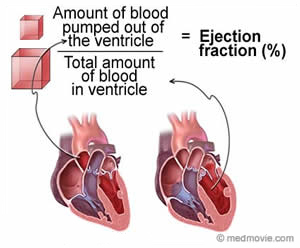

Now, as we have a general insight about the percentages' meaning, let's do some analysis:

We'll split the data into two categories: **ejection fraction< 30** and **ejection fraction>30** to observe where the death events occur most

In [ ]:
ef_normal= data[data['ejection_fraction']>=55]
ef_mild= data[data['ejection_fraction']>=35][data['ejection_fraction']<55]
ef_midS=data[data['ejection_fraction']<35][data['ejection_fraction']>20]
ef_severe= data[data['ejection_fraction']<=20]

In [ ]:

explode = (0, 0.05)
labels = 'Alive', 'Died'

types= [ef_normal,ef_mild,ef_midS,ef_severe]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(15,7))
ax= (ax1, ax2,ax3,ax4)
fig.suptitle('Visualize Ejection Fraction virsus Death Events',fontsize=20)
titles= ['Normal Ejection Fraction', 'Mild Ejection Fraction', 'Mid Severe Ejection Fraction','Severe Ejection Fraction']



for ax, typ,title in zip(ax,types,titles ):
    
    sizes = [len(typ[typ['DEATH_EVENT']==0]),len(typ[typ['DEATH_EVENT']==1])]
    wedges, texts,autopct = ax.pie(sizes, autopct='%1.1f%%', explode=explode,colors=['c','r'], labels=labels)
    ax.set_title(title)
    
    ax.axis('equal') 
plt.show()

For now, we can conclude that most death events occur for patients who have ejection fraction < 20.

Now, rather than having numerical data, let's convert them to classes --> (Normal, Mild, Mid Severe, Severe)

In [ ]:
data['ejection_fraction_c'] = pd.cut(data['ejection_fraction'], bins=[0,20,30,55,np.inf], labels=[3,2,1,0])

In [ ]:
plt.figure(figsize=(10,8))
plt.bar([0,1,2,3], [len(ef_normal),len(ef_mild),len(ef_midS),len(ef_severe)], color='g')
plt.xticks([0,1,2,3], ['ef_normal','ef_mild','ef_midS','ef_severe'])
plt.title("Data Distribution")
plt.grid()

## [Creatine Phosphokinase](#3)
Creatine phosphokinase (CPK) is an enzyme (a protein that helps to elicit chemical changes in your body) found in heart, brain, and skeletal muscles. When muscle tissue is damaged, CPK leaks into blood. Therefore, high levels of CPK usually indicate some sort of stress or injury to heart or other muscles.

**Normal**: 10 to 120 micrograms per liter (mcg/L) 

> **Note**:
> The pattern and timing of a rise or fall in CPK levels can be significant in making a diagnosis. For example, if someone has an intensive workout, this could affect the CPK level but in an acceptable way. If that person has the same high level without exercising, this wouldn't be normal. 

In [ ]:
normal_cpk= data[data['creatinine_phosphokinase']<120]
abnormal_cpk= data[data['creatinine_phosphokinase']>120]

As we can see, the abnormal cases are much higher than the normal ones. In my opinion, this is happening because the enzymes in our bodies change a lot during the day and based on the circumstances. For example, if one patient had a long walk to a hospital to make the CPK's test, this would definitely affect the result.

In [ ]:
plt.figure(figsize=(8,6))
plt.bar([0,1], [len(normal_cpk),len(abnormal_cpk)], color='g')
plt.xticks([0,1], ['normal_cpk','abnormal_cpk'])
plt.title("CPK Data Distribution")
plt.grid()

In [ ]:
import matplotlib.pyplot as plt

labels = 'normal-alive', 'normal-died', 'abnormal-alive', 'abnormal-died'
sizes = [len(normal_cpk[normal_cpk['DEATH_EVENT']==0]),len(normal_cpk[normal_cpk['DEATH_EVENT']==1]),
         len(abnormal_cpk[abnormal_cpk['DEATH_EVENT']==0]),len(abnormal_cpk[abnormal_cpk['DEATH_EVENT']==1])]
explode = (0.05, 0.05,0.05,0.05) 

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title("")
ax1.axis('equal') 

plt.show()

**Conclusion**: There's no obvious pattern in the relation between CPK enzime and death event, thus, not consedring this feature might help get better result.

## [Platelets](#4)
![](https://plateletsociety.co.uk/wp-content/uploads/2018/03/32152048_s-Blood-Labeled-Diagram.jpg)
Platelets are tiny blood cells that help human's body form clots to stop bleeding. If one of blood vessels gets damaged, it sends out signals to the platelets. The platelets then rush to the site of damage. they form a plug (clot) to fix the damage.

**Ideal platelet range**: 150,000 to 400,000 per mcL in most healthy people.

Low platelet count is known as thrombocytopenia. High platelet count is known as thrombocytosis.

In [ ]:
ideal= data[data['platelets']>=150000 ][data['platelets']<=400000 ]
thrombocytopenia= data[data['platelets']<150000 ]
thrombocytosis= data[data['platelets']>400000]

In [ ]:
plt.figure(figsize=(8,6))
plt.bar([0,1,2], [len(ideal),len(thrombocytopenia), len(thrombocytosis)], color=('c','r','y'))
plt.xticks([0,1,2], ['ideal','thrombocytopenia', 'thrombocytosis'])
plt.title("Platelets Data Distribution")
plt.grid()

In [ ]:

labels = [['ideal-alive', 'ideal-died'],['cytopenia-alive', 'cytopenia-died'],['cytosis-alive', 'cytosis-died']]
explode = (0, 0.05)
types= [ideal,thrombocytopenia,thrombocytosis]
ax= (ax1, ax2,ax3)
fig, ax = plt.subplots(1, 3,figsize=(15,7))
fig.suptitle('Visualize Counts virsus Death Events',fontsize=20)
titles= ['Ideal platelets count', 'Low platelets count', 'High platelets count']



for ax, label, typ,title in zip(ax, labels,types,titles ):
    
    sizes = [len(typ[typ['DEATH_EVENT']==0]),len(typ[typ['DEATH_EVENT']==1])]
    wedges, texts,autopct = ax.pie(sizes, autopct='%1.1f%%', explode=explode,colors=['c','r'])
    ax.set_title(title)

    ax.legend(wedges, label,
          title="Death events",
          loc="lower center",
          bbox_to_anchor=(0.75, 0, 0, 0.75))
    
    
    ax.axis('equal') 
plt.show()

As we can see, the death events in the three cases are pretty close to the general death events. However, based on the above graphs, people who have low platelets counts are most likely to pass away. But for the moment, let's consider platelets as a low impact feature.

## [ Serum Creatinine](#5)
A creatinine blood test measures the level of creatinine in the blood. Creatinine is a waste product that forms when creatine, which is found in muscle, breaks down. Creatinine levels in the blood can provide doctors with information about how well kidneys are working, which is not related to our problem. But let's explore the relations:

Normal creatinine levels range **from 0.9 to 1.3** mg/dL in men and **0.6 to 1.1** mg/dL in women

In [ ]:
normal_sc_men= data[data['serum_creatinine']<=1.3][data['sex']==1]
abnormal_sc_men= data[data['serum_creatinine']>1.3][data['sex']==1]

normal_sc_women= data[data['serum_creatinine']<=1.1][data['sex']==0]
abnormal_sc_women= data[data['serum_creatinine']>1.1][data['sex']==0]

In [ ]:
plt.figure(figsize=(8,6))
plt.bar([0,0.3,1,1.3], [len(normal_sc_men),len(abnormal_sc_men),len(normal_sc_women),len(abnormal_sc_women)],width=0.1,
        color=('b','b','hotpink','hotpink'))
plt.xticks([0,0.3,1,1.3], ['normal_sc_men','abnormal_sc_men', 'normal_sc_women','abnormal_sc_women'])
plt.title("SC levels in Men vs Women")
plt.grid()

In [ ]:

labels = [['normal-men-alive', 'normal-men-died'],['abnormal-men-alive', 'abnormal-men-died'],
          ['normal-women-alive', 'normal-women-died'],['abnormal-women-alive', 'abnormal-women-died']]
explode = (0, 0.05)
types= [normal_sc_men,abnormal_sc_men,normal_sc_women, abnormal_sc_women]

fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(15,7))
ax= (ax1, ax2,ax3,ax4)
fig.suptitle('Visualize SC Levels versus Death Events in Men and Women',fontsize=20)
titles= ['Men Normal Level', 'Men Abnormal Level', 'Women Normal Level', 'Women Abnormal Level']



for ax, label, typ,title in zip(ax, labels,types,titles ):
    
    sizes = [len(typ[typ['DEATH_EVENT']==0]),len(typ[typ['DEATH_EVENT']==1])]
    wedges, texts,autopct = ax.pie(sizes, autopct='%1.1f%%', explode=explode,colors=['c','r'])
    ax.set_title(title)

    ax.legend(wedges, label,
          title="Death events",
          loc="lower center",
          bbox_to_anchor=(0.6, 0, 0, 0.6))
    
    
    ax.axis('equal') 
plt.show()

The above graphs say a lot about how this feature correlates with death events in both men and women.

# [Serum Sodium](#6)

A serum sodium test is a routine test that allows doctor to see how much sodium is in blood.  If sodium blood levels are too high or too low, it may mean that one have a problem with kidneys, dehydration, or another medical condition.

A normal blood sodium level is between **135 and 145** milliequivalents per liter (mEq/L). Below that is Hyponatremia and above that is Hypernatremia

In [ ]:
print('serum_sodium mean:', round(data['serum_sodium'].mean()))
print('serum_sodium std:', round(data['serum_sodium'].std()))
print('serum_sodium min:', round(data['serum_sodium'].min()))
print('serum_sodium max:', round(data['serum_sodium'].max()))


In [ ]:
ss_normal = data[data['serum_sodium']>=135][data['serum_sodium']<=145]
ss_hypo= data[data['serum_sodium']<135]
ss_hyper= data[data['serum_sodium']>145]

In [ ]:
plt.figure(figsize=(8,6))
plt.bar([0,1,2], [len(ss_normal),len(ss_hypo),len(ss_hyper)],
        color='g')
plt.xticks([0,1,2], ['normal','hypo', 'hyper','abnormal_sc_women'])
plt.title("serum_sodium levels")
plt.grid()

In [ ]:
explode = (0, 0.05)
labels = 'Alive', 'Died'

types= [ss_normal,ss_hypo,ss_hyper]
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,7))
ax= (ax1, ax2,ax3,ax4)
fig.suptitle('Serum Sodium Level virsus Death Events',fontsize=20)
titles= ['Normal', 'Hyponatremia', 'Hypernatremia']


for ax, typ,title in zip(ax,types,titles ):
    
    sizes = [len(typ[typ['DEATH_EVENT']==0]),len(typ[typ['DEATH_EVENT']==1])]
    wedges, texts,autopct = ax.pie(sizes, autopct='%1.1f%%', explode=explode,colors=['c','r'], labels=labels)
    ax.set_title(title)
    
    ax.axis('equal') 
plt.show()

# [Age](#7)



In [ ]:
age= data['age']

In [ ]:
print('Ages mean:', round(age.mean()))
print('Ages std:', round(age.std()))
print('Ages min:', round(age.min()))
print('Ages max:', round(age.max()))

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt



mu, std = norm.fit(age)
plt.figure(figsize=(12,7))
plt.hist(age, bins=25, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Age distribution with: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.grid()
plt.show()                

In [ ]:
death_age= data[data['DEATH_EVENT']==1]['age']
mu, std = norm.fit(death_age)
plt.figure(figsize=(12,7))
plt.hist(death_age, bins=25, density=True, alpha=0.6, color='r')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "age-based distribution of death cases with: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.grid()
plt.show()   

In [ ]:
age_1= data[data['age']>30][data['age']<=50]
age_2= data[data['age']>50][data['age']<=60]
age_3= data[data['age']>60][data['age']<=70]
age_4= data[data['age']>70]

In [ ]:
plt.figure(figsize=(8,6))
plt.bar([0,1,2,3], [len(age_1),len(age_2),len(age_3),len(age_4)], color='g')
plt.xticks([0,1,2,3], ['Group1','Group2', 'Group3','Group4'])
plt.title("Age Groups Data Distribution")
plt.grid()

In [ ]:

explode = (0, 0.05)
labels = 'Alive', 'Died'

types= [age_1,age_2,age_3,age_4]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(14,7))
ax= (ax1, ax2,ax3,ax4)
fig.suptitle('Visualize Age virsus Death Events',fontsize=20)
titles= ['Group1 (40-50)', 'Group2 (50-60)', 'Group3 (60-70)','Group4 (>70)']



for ax, typ,title in zip(ax,types,titles ):
    
    sizes = [len(typ[typ['DEATH_EVENT']==0]),len(typ[typ['DEATH_EVENT']==1])]
    wedges, texts,autopct = ax.pie(sizes, autopct='%1.1f%%', explode=explode,colors=['c','r'], labels=labels)
    ax.set_title(title)
    
    ax.axis('equal') 
plt.show()

In [ ]:
data['age_c'] = pd.cut(data['age'], bins=[30,50,60,70,np.inf], labels=[0,1,2,3])

# [Time](#8)

The time here means how often patients follow up their cases per year. This should be a very important factor since as we following up to doctors, we most likely discover any health condition and treat it before it gets worst.

In [ ]:
time = data['time']
print('Follow-up time mean:', round(time.mean()))
print('Follow-up time std:', round(time.std()))
print('Follow-up time min:', round(time.min()))
print('Follow-up time max:', round(time.max()))

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

death_time= data[data['DEATH_EVENT']==0]['time']

mu, std = norm.fit(death_time)
plt.figure(figsize=(12,7))
plt.hist(death_time, bins=25, density=True, alpha=1, color='orange')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
title = "Following-up distribution with: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.grid()
plt.show()                

In [ ]:
time_1= data[data['time']>0][data['time']<=100]
time_2= data[data['time']>100][data['time']<=200]
time_3= data[data['time']>200]

explode = (0, 0.05)
labels = 'Alive', 'Died'

types= [time_1,time_2,time_3,]
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,7))
ax= (ax1, ax2,ax3,ax4)
fig.suptitle('Follow-up times virsus Death Events',fontsize=20)
titles= ['Group1 (0-100 time/year)', 'Group2 (100-200 time/year)', 'Group3 (>200 time/year)']



for ax, typ,title in zip(ax,types,titles ):
    
    sizes = [len(typ[typ['DEATH_EVENT']==0]),len(typ[typ['DEATH_EVENT']==1])]
    wedges, texts,autopct = ax.pie(sizes, autopct='%1.1f%%', explode=explode,colors=['c','r'], labels=labels)
    ax.set_title(title)
    
    ax.axis('equal') 
plt.show()

No comments needed, it's very obvious how important this feature is

### Age vs Time

I'm just curious about knowing how both age and time relates to death events, let's see:

In [ ]:
data['time_c'] = pd.cut(data['time'], bins=[0,100,200,np.inf], labels=[0,1,2])

In [ ]:
x= data['age']
y =data['time']
c= data['DEATH_EVENT']
groups = data.groupby('DEATH_EVENT')
name= 'alive','died'

fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.age, group.time, marker='x', linestyle='', ms=8, label=name)
ax.grid()
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Time (days/year)', fontsize=16) 
ax.legend(numpoints=1, loc='upper left')

plt.show()

# [Study The Effect of Categorical Data](#9)

In [ ]:
cat= ['high_blood_pressure','anaemia','diabetes','sex','smoking']
types=[['normal BP','High BP'],['no anaemia','anaemia'],['no diabetes','diabetes'],['Women', 'Men'], ['smoking', 'non-smoking']]
for i,c in enumerate(cat):
    alive = data[data['DEATH_EVENT']==0]
    died= data[data['DEATH_EVENT']==1]
    plt.figure(figsize=(8,5))
    bar1=plt.bar([0,1], alive.groupby(c).count()['age'], width=0.1, color='b', align='center', label="alive")
    bar2= plt.bar([0+0.1,1+0.1], died.groupby(c).count()['age'], width=0.1, color='r', align='center', label="died")
    plt.title(c)
    plt.ylim(0,160)
    plt.xticks([0,1], types[i])
    plt.grid()
    plt.legend()

    hights_odd=[]
    hights_even=[]
    for i,rect in enumerate (bar1 + bar2):
        height = rect.get_height()
        if (i+1)%2==0:
            hights_even.append(height)
        if (i+1)%2!=0:
            hights_odd.append(height)

    for i,rect in enumerate (bar1 + bar2):
        height = rect.get_height()
        if (i+1)%2==0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(round((height/sum(hights_even)*100),2))+"%", ha='center', va='bottom')
        if (i+1)%2!=0:
            plt.text(rect.get_x() + rect.get_width()/2.0, height, '%s' % str(round((height/sum(hights_odd))*100,2))+"%", ha='center', va='bottom')


 # [Split The Data and Select The Most Effective Features](#10)

In [ ]:
data.count()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


cat_attribs= ['ejection_fraction_c', 'age_c', 'time_c']
num_attribs= ['serum_creatinine','serum_sodium']


preprocessing_pipeline = ColumnTransformer([
        ('std_scaler', StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["DEATH_EVENT"]):
    train = data.loc[train_index]
    test = data.loc[test_index]
    
features= ['ejection_fraction_c', 'age_c', 'time_c','serum_creatinine','serum_sodium']


In [ ]:
y_train= train['DEATH_EVENT']
y_test= test['DEATH_EVENT']

X_train= train[features]
X_test= test[features]

X_train.index = np.arange(len(X_train))
X_test.index = np.arange(len(X_test))

y_train.index = np.arange(len(y_train))
y_test.index = np.arange(len(y_test))

In [ ]:
X_train= preprocessing_pipeline.fit_transform(X_train)
X_test=  preprocessing_pipeline.fit_transform(X_test)

In [ ]:
X_train.shape

# [Modeling](#11)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

print("Acc:",accuracy_score(y_test, svm_pred))
print("Precision:",precision_score(y_test, svm_pred))
print("Recall:",recall_score(y_test, svm_pred))
print('f1-score', f1_score(y_test, svm_pred))
print('ROC score', roc_auc_score(y_test, svm_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)

print("Acc:",accuracy_score(y_test, logistic_reg_pred))

print("Precision:",precision_score(y_test, logistic_reg_pred))
print("Recall:",recall_score(y_test, logistic_reg_pred))

print('f1-score', f1_score(y_test, logistic_reg_pred))

print('ROC score', roc_auc_score(y_test, logistic_reg_pred))

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=0)
model.fit(X_train, y_train)
lgbm_preds = model.predict(X_test)

print("Acc:",accuracy_score(y_test, lgbm_preds))

print("Precision:",precision_score(y_test, lgbm_preds))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, lgbm_preds))

print('f1-score', f1_score(y_test, lgbm_preds))

print('ROC score', roc_auc_score(y_test, lgbm_preds))

In [ ]:
import xgboost
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=0)
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)

print("Acc:",accuracy_score(y_test, xgb_pred))

print("Precision:",precision_score(y_test, xgb_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, xgb_pred))

print('f1-score', f1_score(y_test, xgb_pred))

print('ROC score', roc_auc_score(y_test, xgb_pred))


In [ ]:
from sklearn.metrics import roc_curve
preds= [svm_pred, logistic_reg_pred,lgbm_preds,xgb_pred]
labels= ['SVM', 'Logistic Regression',"LGBM",'XGBRF']
plt.figure(figsize=(10,8))

for pred, label in zip(preds,labels):
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)  
plt.legend()